In [22]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as data

In [13]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'  # Make sure to specify an end date as well
ticker_symbol='AAPL'
df=yf.download(ticker_symbol,start=start,end=end)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327461,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702919,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676109,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095581,144114400


In [15]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [16]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


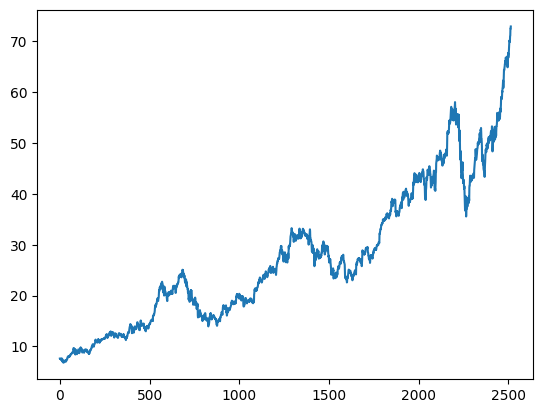

In [17]:
plt.plot(df.Close)

In [19]:
ma100=df.Close.rolling(100).mean()
ma200=df.Close.rolling(200).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

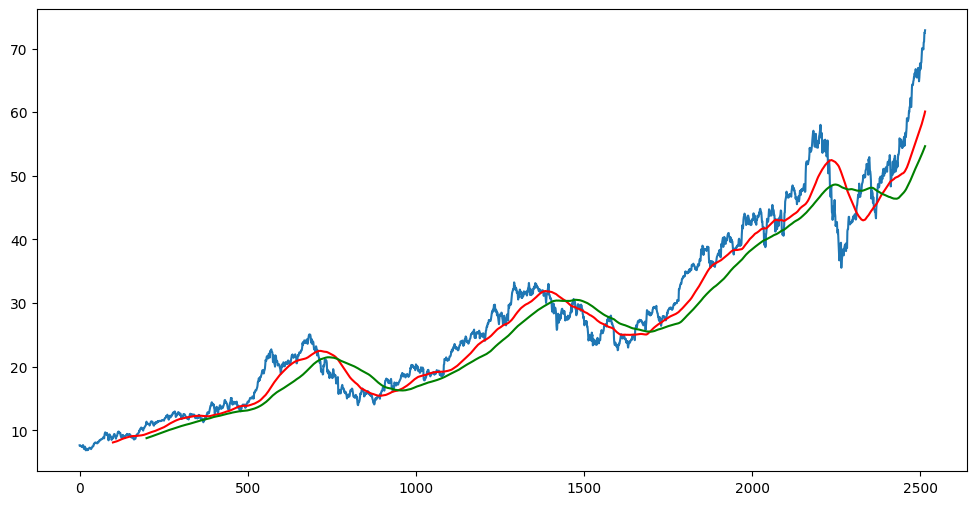

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [21]:
df.shape

(2515, 5)

In [23]:
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(1760, 1)
(755, 1)


In [26]:
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [27]:
data_test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [29]:
train_arr=scaler.fit_transform(data_train)
train_arr

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [30]:
x_train=[]
y_train=[]

for i in range(100,train_arr.shape[0]):
    x_train.append(train_arr[i-100:i])
    y_train.append(train_arr[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [31]:
#ML Model 
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 7s 100ms/step - loss: 0.0717
Epoch 2/50
52/52 [==============================] - 5s 102ms/step - loss: 0.0124
Epoch 3/50
52/52 [==============================] - 5s 103ms/step - loss: 0.0112
Epoch 4/50
52/52 [==============================] - 5s 102ms/step - loss: 0.0096
Epoch 5/50
52/52 [==============================] - 5s 103ms/step - loss: 0.0106
Epoch 6/50
52/52 [==============================] - 5s 103ms/step - loss: 0.0092
Epoch 7/50
52/52 [==============================] - 5s 102ms/step - loss: 0.0079
Epoch 8/50
52/52 [==============================] - 5s 104ms/step - loss: 0.0086
Epoch 9/50
52/52 [==============================] - 5s 104ms/step - loss: 0.0087
Epoch 10/50
52/52 [==============================] - 5s 104ms/step - loss: 0.0070
Epoch 11/50
52/52 [==============================] - 6s 108ms/step - loss: 0.0070
Epoch 12/50
52/52 [==============================] - 6s 110ms/step - loss: 0.0072
Epoch 13/50
52/52 [======

In [37]:
model.save('keras_model.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
data_test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [42]:
past_100_days=data_train.tail(100)

In [44]:
print(type(past_100_days))
print(type(data_test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [54]:
data_test.isna().sum()

Close    0
dtype: int64

In [52]:
past_100_days.head()

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000


In [57]:
input_data=scaler.fit_transform(data_test)

In [58]:
input_data.shape

(755, 1)

In [59]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [60]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [61]:
x_test.shape

(655, 100, 1)

In [62]:
y_test.shape

(655,)

In [63]:
y_predicted=model.predict(x_test)

21/21 [==============================] - 1s 25ms/step


In [64]:
y_predicted.shape

(655, 1)

In [65]:
scaler.scale_

array([0.02276608])

In [66]:
scalef=1/0.02276608
y_predicted=y_predicted*scalef
y_test=y_test*scalef

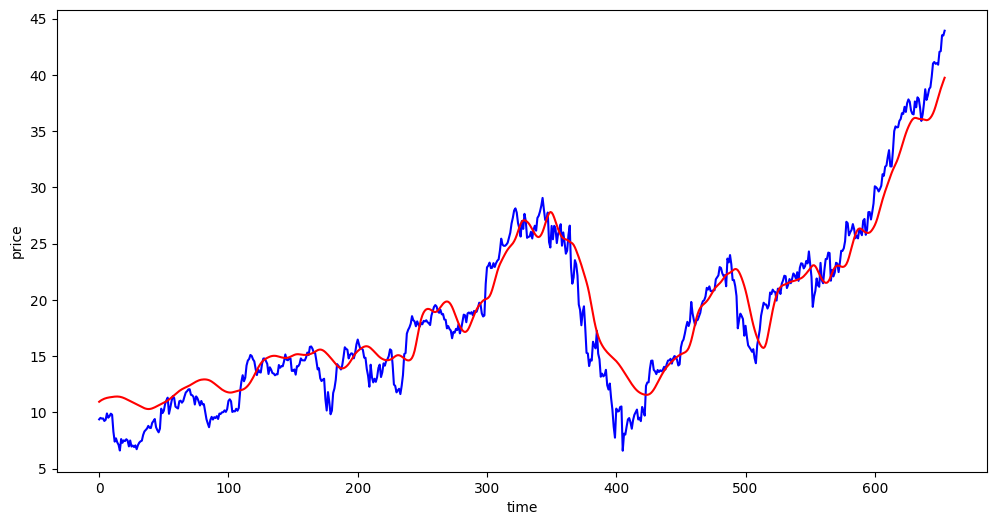

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()